In [5]:
import sqlite3
import requests
import seaborn as sns
#cur = conn.cursor()
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from src.make_db import create_movies_db


In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [86]:
conn = sqlite3.connect('data\movies.db')
movie_title = pd.read_sql ('''SELECT original_title, release_date, genres , worldwide_gross
                              FROM imdb_title_basics
                              JOIN tn_movie_budgets
                              ON primary_title=movie
                              
                              
                              ''',conn)

movie_title

,original_title,release_date,genres,worldwide_gross
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy","$73,706"
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy","$122,133,227"
2,The Overnight,"Jun 19, 2015",None,"$1,165,996"
3,On the Road,"Mar 22, 2013","Adventure,Drama,Romance","$9,313,302"
4,The Secret Life of Walter Mitty,"Dec 25, 2013","Adventure,Comedy,Drama","$187,861,183"
...,...,...,...,...
3810,Trapped,"Sep 20, 2002",None,"$6,916,869"
3811,The Promise,"Apr 21, 2017",Drama,"$10,551,417"
3812,Sublime,"Mar 13, 2007",Documentary,$0
3813,Columbus,"Aug 4, 2017",Comedy,"$1,110,511"


In [111]:
movie_title['list_genres'] = movie_title['genres'].map(lambda x: str(x).split(','))

movie_title['month'] = movie_title['release_date'].map(lambda x: x[:3])

movie_title.head(2)

,original_title,release_date,genres,worldwide_gross,list_genres,Action,Adventure,Animation,Biography,Comedy,...,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,month
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy",73706.0,"[Action, Animation, Comedy]",True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,Dec
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy",122133227.0,"[Action, Adventure, Fantasy]",True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,Aug


In [112]:
list_of_genre_types = []
for i in range(len(movie_title)):
    for x in movie_title['list_genres'][i]:
        if x in list_of_genre_types:
            continue
        elif x not in list_of_genre_types:
            list_of_genre_types.append(x)

In [113]:
list_of_genre_types.sort()
list_of_genre_types

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'None',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [99]:
for genre in list_of_genre_types:
    movie_title[genre] = movie_title['list_genres'].map(lambda x: True if (genre in x) else False)

In [100]:
movie_title

,original_title,release_date,genres,worldwide_gross,list_genres,Action,Adventure,Animation,Biography,Comedy,...,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,month
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy","$73,706","[Action, Animation, Comedy]",True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,Dec
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy","$122,133,227","[Action, Adventure, Fantasy]",True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,Aug
2,The Overnight,"Jun 19, 2015",None,"$1,165,996",[None],False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,Jun
3,On the Road,"Mar 22, 2013","Adventure,Drama,Romance","$9,313,302","[Adventure, Drama, Romance]",False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,Mar
4,The Secret Life of Walter Mitty,"Dec 25, 2013","Adventure,Comedy,Drama","$187,861,183","[Adventure, Comedy, Drama]",False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,Trapped,"Sep 20, 2002",None,"$6,916,869",[None],False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,Sep
3811,The Promise,"Apr 21, 2017",Drama,"$10,551,417",[Drama],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Apr
3812,Sublime,"Mar 13, 2007",Documentary,$0,[Documentary],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Mar
3813,Columbus,"Aug 4, 2017",Comedy,"$1,110,511",[Comedy],False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,Aug


In [101]:
movie_title['worldwide_gross'] = movie_title['worldwide_gross'].str.replace('$', '').str.replace(',','')
movie_title['worldwide_gross'] = movie_title['worldwide_gross'].astype(float)

In [102]:
movie_title

,original_title,release_date,genres,worldwide_gross,list_genres,Action,Adventure,Animation,Biography,Comedy,...,News,None,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,month
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy",73706.0,"[Action, Animation, Comedy]",True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,Dec
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy",122133227.0,"[Action, Adventure, Fantasy]",True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,Aug
2,The Overnight,"Jun 19, 2015",None,1165996.0,[None],False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,Jun
3,On the Road,"Mar 22, 2013","Adventure,Drama,Romance",9313302.0,"[Adventure, Drama, Romance]",False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,Mar
4,The Secret Life of Walter Mitty,"Dec 25, 2013","Adventure,Comedy,Drama",187861183.0,"[Adventure, Comedy, Drama]",False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,Trapped,"Sep 20, 2002",None,6916869.0,[None],False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,Sep
3811,The Promise,"Apr 21, 2017",Drama,10551417.0,[Drama],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Apr
3812,Sublime,"Mar 13, 2007",Documentary,0.0,[Documentary],False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Mar
3813,Columbus,"Aug 4, 2017",Comedy,1110511.0,[Comedy],False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,Aug


In [104]:
gross_dict = {}

for genre in list_of_genre_types:
    gross_dict[genre] = {'average_gross': movie_title[movie_title[genre] == True]['worldwide_gross'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [105]:
del gross_dict['Reality-TV']

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


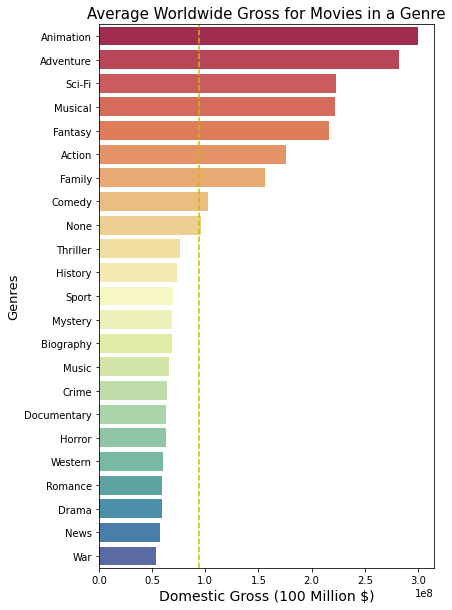

In [106]:
gross_dict_sorted = dict(sorted(gross_dict.items(), key=lambda item: item[1]['average_gross']))
gross_sorted = [value['average_gross'] for key, value in gross_dict_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_dict_sorted.items()][::-1]
fig, ax = plt.subplots(figsize=(6,10))
# Draw plot
sns.barplot(gross_sorted, genres_sorted, palette = 'Spectral', orient='horizonatal')
# Add a line to show the average domestic gross for all movies.
avg_gross = np.mean(movie_title['worldwide_gross'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')
# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('Domestic Gross (100 Million $)', fontsize=14)
ax.set_title('Average Worldwide Gross for Movies in a Genre', fontsize=15);

,original_title,release_date,genres,worldwide_gross,month
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy","$73,706",Dec
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy","$122,133,227",Aug


In [118]:
movie_title = movie_title.sort_values('worldwide_gross', ascending=False)

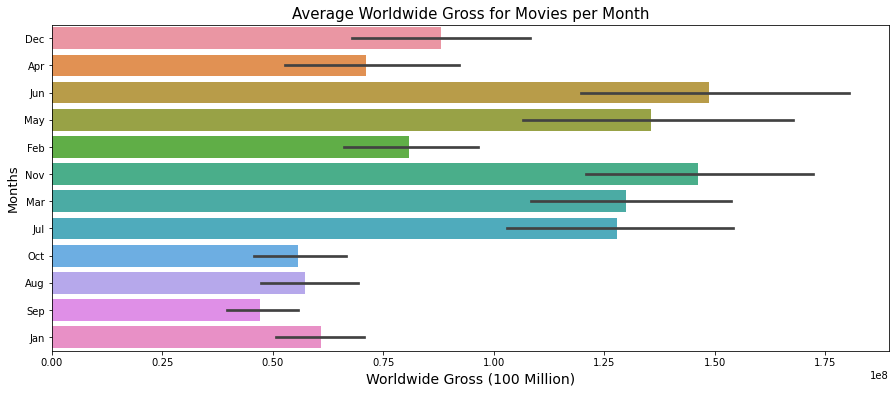

In [130]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=movie_title, x= 'worldwide_gross', y='month')
ax.set_ylabel('Months', fontsize=13)
ax.set_xlabel('Worldwide Gross (100 Million)', fontsize=14)
ax.set_title('Average Worldwide Gross for Movies per Month', fontsize=15);